# Session 2


### Introduction to applied data science
TA: Nima Chartab

### For the detailed info look at the full [documentation of numpy](https://docs.scipy.org/doc/numpy/reference)

### First import the needed packages (numpy and matplotlib for this session)

In [2]:
import numpy as np
import matplotlib.pylab as plt

### Scalar-array and array-array operations

In [3]:
#let's make a 2*3 array
A=np.array([[1,2,3],
            [4,5,6]])
A

array([[1, 2, 3],
       [4, 5, 6]])

### note that arithmetic operations work element-wise 

In [4]:
2*A

array([[ 2,  4,  6],
       [ 8, 10, 12]])

In [5]:
A+4

array([[ 5,  6,  7],
       [ 8,  9, 10]])

In [6]:
B=np.array([[7,9,10],[4,7,2]])
B

array([[ 7,  9, 10],
       [ 4,  7,  2]])

In [7]:
B-A

array([[ 6,  7,  7],
       [ 0,  2, -4]])

In [9]:
B*A # note that this does not return matrix multiplication

array([[ 7, 18, 30],
       [16, 35, 12]])

In [10]:
# len()
#number of row
len(A)

2

In [15]:
#number of column
len(A[0])

3

## Matrix multiplication

![](fig/MatMult.png)

### Let's write a function for matrix multiplication without using numpy

In [17]:
#zip function 
A=[2,4]
B=[[3,4],
   [5,8]]

In [18]:
list(zip(A,B))

[(2, [3, 4]), (4, [5, 8])]

In [19]:
list(zip(*B))

[(3, 5), (4, 8)]

In [20]:
#let's define A,B
A=[[1,2,3],
    [4,5,6]]
B=[[3,4],
   [5,6],
   [4,7]]

In [25]:
def MatrixMulti(A,B):
    """
    A function which computes matrix multiplication of the first 
    and second inputs. Inputs should be list-like.
    """
    
    if len(A[0])==len(B):
        R=[[sum(x*y for x,y in zip(A_row,B_col)) for B_col in zip(*B)] for A_row in A]
        return R
    else: 
        print('Matrix dimensions do not match')

In [26]:
MatrixMulti(A,B)

[[25, 37], [61, 88]]

### let's do it with numpy

In [27]:
#np.dot
A=np.array(A)
B=np.array(B)
np.dot(A,B)

array([[25, 37],
       [61, 88]])

In [28]:
A*B

ValueError: operands could not be broadcast together with shapes (2,3) (3,2) 

In [29]:
#you can convert array to matrix and use arthmetic operations
A=np.matrix(A)
A

matrix([[1, 2, 3],
        [4, 5, 6]])

In [30]:
B=np.matrix(B)
B

matrix([[3, 4],
        [5, 6],
        [4, 7]])

In [31]:
A*B

matrix([[25, 37],
        [61, 88]])

In [44]:
#Transpose
v=np.ones(10)
v

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [45]:
v=np.matrix(v)
v

matrix([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [46]:
v=v.T
v

matrix([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [47]:
D=np.random.randint(0,2,(10,10))
D

array([[1, 0, 1, 0, 0, 1, 1, 0, 1, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 1, 0, 0, 1, 0, 0],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 0, 1, 1, 1, 1, 0],
       [0, 1, 1, 0, 1, 0, 0, 0, 0, 1],
       [1, 0, 0, 1, 0, 0, 0, 1, 1, 1],
       [1, 1, 1, 1, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0, 1],
       [1, 0, 0, 1, 0, 1, 1, 1, 1, 1]])

In [48]:
D=np.matrix(D)

In [49]:
#get Dv
D*v

matrix([[5.],
        [2.],
        [5.],
        [8.],
        [7.],
        [4.],
        [5.],
        [6.],
        [4.],
        [7.]])

### Example: Market share of technology companies

### Financial analysis of rise and decline of three technology companies show that the monthly market shares of three companies A, B and C can be estimated by a transformation matrix P:

### \begin{equation*}
P=\begin{bmatrix}
0.8&0.03&0.2\\
0.1&0.95&0.05\\
0.1&0.02&0.75
\end{bmatrix}\end{equation*}


### For example: the first column of matrix P represents the share of Company A that will pass to Company A, Company B and Company C respectively. The initial market share of the three companies is 
\begin{equation*}
I=\begin{bmatrix}
30\\
15\\
55
\end{bmatrix}\end{equation*}.

### Find the final market share of the 3 companies A, B and C.

In [51]:
P=np.array([[0.8,0.03,0.2],[0.1,0.95,0.05],[0.1,0.02,0.75]])
P

array([[0.8 , 0.03, 0.2 ],
       [0.1 , 0.95, 0.05],
       [0.1 , 0.02, 0.75]])

In [52]:
I=np.array([[30],[15],[55]])
I

array([[30],
       [15],
       [55]])

In [53]:
#predicted market share after 1 month
I1=np.dot(P,I)
I1

array([[35.45],
       [20.  ],
       [44.55]])

In [61]:
#let's write a function which takes P and I and finds share after N months
def Market_Share(Trans, Init, N):
    """
    A function for market share problem. 
    """
    S=np.dot(Trans,Init)
    for i in range(N-1):
        S=np.dot(Trans,S)
    return(S.T[0].tolist())

In [62]:
Market_Share(P,I,3)

[38.510675000000006, 29.18875, 32.300574999999995]

In [96]:
N=range(1,41)
Share=[]
for j in N:
    Share.append(Market_Share(P,I,j))

In [97]:
Share

[[35.45, 20.0, 44.55],
 [37.870000000000005, 24.7725, 37.357499999999995],
 [38.510675000000006, 29.18875, 32.300574999999995],
 [38.14431750000001, 33.19540875, 28.660273749999998],
 [37.243371012500006, 36.783083749999996, 25.973545237499998],
 [36.09289837000001, 39.966943925624996, 23.940157704375],
 [34.86135855464376, 42.774894451562496, 22.363746993793754],
 [33.64508307602063, 45.24047293413844, 21.114443989840943],
 [32.49616944680885, 47.39867979452563, 20.105150758665538],
 [31.439926103015956, 49.283620287413505, 19.276453609570552],
 [30.48574021294928, 50.92725456382295, 18.58700522322778],
 [29.63381085191967, 52.358816118088114, 18.007373029992223],
 [28.879287771076825, 53.604625048875285, 17.516087180047897],
 [28.214786404337296, 54.68812693254159, 17.09708666312111],
 [27.631890264070307, 55.6300535595043, 16.738056176425395],
 [27.122025053326453, 56.448642716757384, 16.429332229916163],
 [26.67694577014712, 57.15987969774797, 16.163174532104915],
 [26.288987913471

In [98]:
Share=np.array(Share)
Share=Share.T

In [99]:
Share[0]

array([35.45      , 37.87      , 38.510675  , 38.1443175 , 37.24337101,
       36.09289837, 34.86135855, 33.64508308, 32.49616945, 31.4399261 ,
       30.48574021, 29.63381085, 28.87928777, 28.2147864 , 27.63189026,
       27.12202505, 26.67694577, 26.28898791, 25.95117712, 25.6572558 ,
       25.40166306, 25.17948978, 24.98642248, 24.81868357, 24.67297263,
       24.54641101, 24.43649102, 24.3410301 , 24.25812982, 24.18613972,
       24.12362538, 24.06934043, 24.02220212, 23.98126996, 23.94572707,
       23.91486404, 23.88806476, 23.86479421, 23.8445878 , 23.82704207])

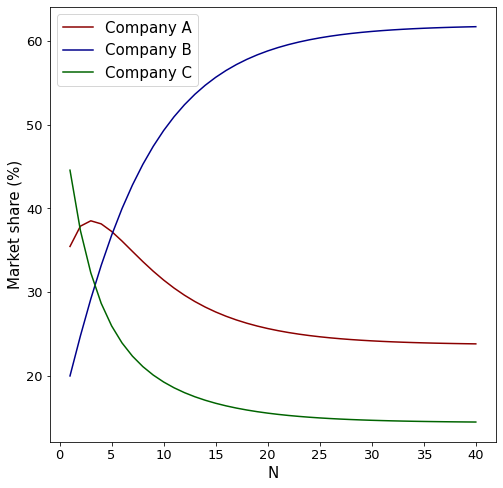

In [100]:
#plot data

plt.figure(figsize=(8,8))
plt.plot(N,Share[0],c='darkred',label="Company A")
plt.plot(N,Share[1],c='darkblue',label="Company B")
plt.plot(N,Share[2],c='darkgreen',label="Company C")
plt.xlabel('N', fontsize=15)
plt.ylabel('Market share (%)', fontsize=15)
plt.legend(fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.show()



In [95]:
#Share[0][99],Share[1][99],Share[2][99]

(23.711364426375237, 61.85563187485769, 14.433003698766914)

In [101]:
Share[0][39],Share[1][39],Share[2][39]

(23.827042071099413, 61.673050251738104, 14.499907677162454)

### Is there any way to find final market share without estimating it month-by-month?

### We reach the ultimate market share when $PS=S$, where $S$ is the market share vector. So, to find the final market share we just need to find eigenvector of $P$ with eigenvalue of 1

In [103]:
E=np.linalg.eig(P)
E

(array([0.6316784, 1.       , 0.8683216]),
 array([[-0.76769674,  0.34973152,  0.51126117],
        [ 0.14305534,  0.91234311, -0.80695536],
        [ 0.6246414 ,  0.21288006,  0.2956942 ]]))

In [107]:
SF=E[1].T[1]
SF

array([0.34973152, 0.91234311, 0.21288006])

In [110]:
SF/np.sum(SF)*100

array([23.71134021, 61.8556701 , 14.43298969])